In [26]:
import numpy as np
import matplotlib.pyplot as plt
from core.integrators import define_ode, euler

In [27]:
n_qubits = 2
J = 1/2
B = 1/2
fs = [[-1j*J], [-1j*B, -1j*B]]
params_init = np.array([1.0, 1.0])
ops = [["ZZ"], ["XI", "IX"]]

hs = [-2.0*J, -B, -B]
opsH = ["ZZ", "XI", "IX"]

# Time discretization
dt = 0.01
Nt = 10

In [28]:
ode = define_ode(ops, opsH, fs, hs, n_qubits)    # Define the diff. equation RHS as a function of the parameters

params_evolved = euler(ode, params_init, dt, Nt) # Integrate in time!

           ┌───┐   ┌─────────┐ ░  ░ ┌───┐        ░                   ░ ┌───┐»
ancilla: ──┤ H ├───┤ P(-π/2) ├─░──░─┤ X ├───■────░───────────────────░─┤ X ├»
         ┌─┴───┴──┐└─────────┘ ░  ░ └───┘┌──┴──┐ ░ ┌─────┐┌────────┐ ░ └───┘»
 data_0: ┤0       ├────────────░──░──────┤0    ├─░─┤0    ├┤0       ├─░──────»
         │  in_st │            ░  ░      │  ZZ │ ░ │  ZZ ││  XI+IX │ ░      »
 data_1: ┤1       ├────────────░──░──────┤1    ├─░─┤1    ├┤1       ├─░──────»
         └────────┘            ░  ░      └─────┘ ░ └─────┘└────────┘ ░      »
   cr: 1/═══════════════════════════════════════════════════════════════════»
                                                                            »
«                 ░ ┌───┐┌─┐
«ancilla: ───■────░─┤ H ├┤M├
«         ┌──┴──┐ ░ └───┘└╥┘
« data_0: ┤0    ├─░───────╫─
«         │  ZZ │ ░       ║ 
« data_1: ┤1    ├─░───────╫─
«         └─────┘ ░       ║ 
«   cr: 1/════════════════╩═
«                         0 
           ┌───┐   ┌─────────┐ ░  ░ ┌

           ┌───┐   ┌────────┐ ░  ░ ┌───┐        ░         ░ ┌───┐        ░ »
ancilla: ──┤ H ├───┤ P(π/2) ├─░──░─┤ X ├───■────░─────────░─┤ X ├───■────░─»
         ┌─┴───┴──┐└────────┘ ░  ░ └───┘┌──┴──┐ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░ »
 data_0: ┤0       ├───────────░──░──────┤0    ├─░─┤0    ├─░──────┤0    ├─░─»
         │  in_st │           ░  ░      │  ZZ │ ░ │  ZZ │ ░      │  IX │ ░ »
 data_1: ┤1       ├───────────░──░──────┤1    ├─░─┤1    ├─░──────┤1    ├─░─»
         └────────┘           ░  ░      └─────┘ ░ └─────┘ ░      └─────┘ ░ »
   cr: 1/══════════════════════════════════════════════════════════════════»
                                                                           »
«                    ░ ┌───┐┌─┐
«ancilla: ───────────░─┤ H ├┤M├
«         ┌────────┐ ░ └───┘└╥┘
« data_0: ┤0       ├─░───────╫─
«         │  XI+IX │ ░       ║ 
« data_1: ┤1       ├─░───────╫─
«         └────────┘ ░       ║ 
«   cr: 1/═══════════════════╩═
«                            0 
           ┌───┐   

           ┌───┐   ┌─────────┐ ░         ░ ┌───┐        ░            ░ ┌───┐»
ancilla: ──┤ H ├───┤ P(-π/2) ├─░─────────░─┤ X ├───■────░────────────░─┤ X ├»
         ┌─┴───┴──┐└─────────┘ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░ ┌────────┐ ░ └───┘»
 data_0: ┤0       ├────────────░─┤0    ├─░──────┤0    ├─░─┤0       ├─░──────»
         │  in_st │            ░ │  ZZ │ ░      │  XI │ ░ │  XI+IX │ ░      »
 data_1: ┤1       ├────────────░─┤1    ├─░──────┤1    ├─░─┤1       ├─░──────»
         └────────┘            ░ └─────┘ ░      └─────┘ ░ └────────┘ ░      »
   cr: 1/═══════════════════════════════════════════════════════════════════»
                                                                            »
«                 ░ ┌───┐┌─┐
«ancilla: ───■────░─┤ H ├┤M├
«         ┌──┴──┐ ░ └───┘└╥┘
« data_0: ┤0    ├─░───────╫─
«         │  IX │ ░       ║ 
« data_1: ┤1    ├─░───────╫─
«         └─────┘ ░       ║ 
«   cr: 1/════════════════╩═
«                         0 
           ┌───┐   ┌─────────┐ ░     

           ┌───┐   ┌────────┐ ░         ░ ┌───┐        ░  ░ ┌───┐        ░ »
ancilla: ──┤ H ├───┤ P(π/2) ├─░─────────░─┤ X ├───■────░──░─┤ X ├───■────░─»
         ┌─┴───┴──┐└────────┘ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░  ░ └───┘┌──┴──┐ ░ »
 data_0: ┤0       ├───────────░─┤0    ├─░──────┤0    ├─░──░──────┤0    ├─░─»
         │  in_st │           ░ │  ZZ │ ░      │  IX │ ░  ░      │  IX │ ░ »
 data_1: ┤1       ├───────────░─┤1    ├─░──────┤1    ├─░──░──────┤1    ├─░─»
         └────────┘           ░ └─────┘ ░      └─────┘ ░  ░      └─────┘ ░ »
   cr: 1/══════════════════════════════════════════════════════════════════»
                                                                           »
«                    ░ ┌───┐┌─┐
«ancilla: ───────────░─┤ H ├┤M├
«         ┌────────┐ ░ └───┘└╥┘
« data_0: ┤0       ├─░───────╫─
«         │  XI+IX │ ░       ║ 
« data_1: ┤1       ├─░───────╫─
«         └────────┘ ░       ║ 
«   cr: 1/═══════════════════╩═
«                            0 
           ┌───┐   

           ┌───┐   ┌────────┐ ░         ░ ┌───┐        ░  ░ ┌───┐        ░ »
ancilla: ──┤ H ├───┤ P(π/2) ├─░─────────░─┤ X ├───■────░──░─┤ X ├───■────░─»
         ┌─┴───┴──┐└────────┘ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░  ░ └───┘┌──┴──┐ ░ »
 data_0: ┤0       ├───────────░─┤0    ├─░──────┤0    ├─░──░──────┤0    ├─░─»
         │  in_st │           ░ │  ZZ │ ░      │  XI │ ░  ░      │  XI │ ░ »
 data_1: ┤1       ├───────────░─┤1    ├─░──────┤1    ├─░──░──────┤1    ├─░─»
         └────────┘           ░ └─────┘ ░      └─────┘ ░  ░      └─────┘ ░ »
   cr: 1/══════════════════════════════════════════════════════════════════»
                                                                           »
«                    ░ ┌───┐┌─┐
«ancilla: ───────────░─┤ H ├┤M├
«         ┌────────┐ ░ └───┘└╥┘
« data_0: ┤0       ├─░───────╫─
«         │  XI+IX │ ░       ║ 
« data_1: ┤1       ├─░───────╫─
«         └────────┘ ░       ║ 
«   cr: 1/═══════════════════╩═
«                            0 
           ┌───┐   

           ┌───┐   ┌─────────┐ ░         ░ ┌───┐        ░            ░ ┌───┐»
ancilla: ──┤ H ├───┤ P(-π/2) ├─░─────────░─┤ X ├───■────░────────────░─┤ X ├»
         ┌─┴───┴──┐└─────────┘ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░ ┌────────┐ ░ └───┘»
 data_0: ┤0       ├────────────░─┤0    ├─░──────┤0    ├─░─┤0       ├─░──────»
         │  in_st │            ░ │  ZZ │ ░      │  IX │ ░ │  XI+IX │ ░      »
 data_1: ┤1       ├────────────░─┤1    ├─░──────┤1    ├─░─┤1       ├─░──────»
         └────────┘            ░ └─────┘ ░      └─────┘ ░ └────────┘ ░      »
   cr: 1/═══════════════════════════════════════════════════════════════════»
                                                                            »
«                 ░ ┌───┐┌─┐
«ancilla: ───■────░─┤ H ├┤M├
«         ┌──┴──┐ ░ └───┘└╥┘
« data_0: ┤0    ├─░───────╫─
«         │  IX │ ░       ║ 
« data_1: ┤1    ├─░───────╫─
«         └─────┘ ░       ║ 
«   cr: 1/════════════════╩═
«                         0 
           ┌───┐   ┌────────┐ ░  ░ ┌─

           ┌───┐   ┌─────────┐ ░         ░ ┌───┐        ░            ░ ┌───┐»
ancilla: ──┤ H ├───┤ P(-π/2) ├─░─────────░─┤ X ├───■────░────────────░─┤ X ├»
         ┌─┴───┴──┐└─────────┘ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░ ┌────────┐ ░ └───┘»
 data_0: ┤0       ├────────────░─┤0    ├─░──────┤0    ├─░─┤0       ├─░──────»
         │  in_st │            ░ │  ZZ │ ░      │  XI │ ░ │  XI+IX │ ░      »
 data_1: ┤1       ├────────────░─┤1    ├─░──────┤1    ├─░─┤1       ├─░──────»
         └────────┘            ░ └─────┘ ░      └─────┘ ░ └────────┘ ░      »
   cr: 1/═══════════════════════════════════════════════════════════════════»
                                                                            »
«                 ░ ┌───┐┌─┐
«ancilla: ───■────░─┤ H ├┤M├
«         ┌──┴──┐ ░ └───┘└╥┘
« data_0: ┤0    ├─░───────╫─
«         │  ZZ │ ░       ║ 
« data_1: ┤1    ├─░───────╫─
«         └─────┘ ░       ║ 
«   cr: 1/════════════════╩═
«                         0 
           ┌───┐   ┌─────────┐ ░     

           ┌───┐   ┌────────┐ ░         ░ ┌───┐        ░  ░ ┌───┐        ░ »
ancilla: ──┤ H ├───┤ P(π/2) ├─░─────────░─┤ X ├───■────░──░─┤ X ├───■────░─»
         ┌─┴───┴──┐└────────┘ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░  ░ └───┘┌──┴──┐ ░ »
 data_0: ┤0       ├───────────░─┤0    ├─░──────┤0    ├─░──░──────┤0    ├─░─»
         │  in_st │           ░ │  ZZ │ ░      │  XI │ ░  ░      │  IX │ ░ »
 data_1: ┤1       ├───────────░─┤1    ├─░──────┤1    ├─░──░──────┤1    ├─░─»
         └────────┘           ░ └─────┘ ░      └─────┘ ░  ░      └─────┘ ░ »
   cr: 1/══════════════════════════════════════════════════════════════════»
                                                                           »
«                    ░ ┌───┐┌─┐
«ancilla: ───────────░─┤ H ├┤M├
«         ┌────────┐ ░ └───┘└╥┘
« data_0: ┤0       ├─░───────╫─
«         │  XI+IX │ ░       ║ 
« data_1: ┤1       ├─░───────╫─
«         └────────┘ ░       ║ 
«   cr: 1/═══════════════════╩═
«                            0 
           ┌───┐   

           ┌───┐   ┌────────┐ ░  ░ ┌───┐        ░  ░ ┌───┐        ░        »
ancilla: ──┤ H ├───┤ P(π/2) ├─░──░─┤ X ├───■────░──░─┤ X ├───■────░────────»
         ┌─┴───┴──┐└────────┘ ░  ░ └───┘┌──┴──┐ ░  ░ └───┘┌──┴──┐ ░ ┌─────┐»
 data_0: ┤0       ├───────────░──░──────┤0    ├─░──░──────┤0    ├─░─┤0    ├»
         │  in_st │           ░  ░      │  ZZ │ ░  ░      │  ZZ │ ░ │  ZZ │»
 data_1: ┤1       ├───────────░──░──────┤1    ├─░──░──────┤1    ├─░─┤1    ├»
         └────────┘           ░  ░      └─────┘ ░  ░      └─────┘ ░ └─────┘»
   cr: 1/══════════════════════════════════════════════════════════════════»
                                                                           »
«                    ░ ┌───┐┌─┐
«ancilla: ───────────░─┤ H ├┤M├
«         ┌────────┐ ░ └───┘└╥┘
« data_0: ┤0       ├─░───────╫─
«         │  XI+IX │ ░       ║ 
« data_1: ┤1       ├─░───────╫─
«         └────────┘ ░       ║ 
«   cr: 1/═══════════════════╩═
«                            0 
           ┌───┐   

           ┌───┐   ┌─────────┐ ░         ░ ┌───┐        ░            ░ ┌───┐»
ancilla: ──┤ H ├───┤ P(-π/2) ├─░─────────░─┤ X ├───■────░────────────░─┤ X ├»
         ┌─┴───┴──┐└─────────┘ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░ ┌────────┐ ░ └───┘»
 data_0: ┤0       ├────────────░─┤0    ├─░──────┤0    ├─░─┤0       ├─░──────»
         │  in_st │            ░ │  ZZ │ ░      │  XI │ ░ │  XI+IX │ ░      »
 data_1: ┤1       ├────────────░─┤1    ├─░──────┤1    ├─░─┤1       ├─░──────»
         └────────┘            ░ └─────┘ ░      └─────┘ ░ └────────┘ ░      »
   cr: 1/═══════════════════════════════════════════════════════════════════»
                                                                            »
«                 ░ ┌───┐┌─┐
«ancilla: ───■────░─┤ H ├┤M├
«         ┌──┴──┐ ░ └───┘└╥┘
« data_0: ┤0    ├─░───────╫─
«         │  IX │ ░       ║ 
« data_1: ┤1    ├─░───────╫─
«         └─────┘ ░       ║ 
«   cr: 1/════════════════╩═
«                         0 
           ┌───┐   ┌─────────┐ ░     

           ┌───┐   ┌─────────┐ ░  ░ ┌───┐        ░                   ░ ┌───┐»
ancilla: ──┤ H ├───┤ P(-π/2) ├─░──░─┤ X ├───■────░───────────────────░─┤ X ├»
         ┌─┴───┴──┐└─────────┘ ░  ░ └───┘┌──┴──┐ ░ ┌─────┐┌────────┐ ░ └───┘»
 data_0: ┤0       ├────────────░──░──────┤0    ├─░─┤0    ├┤0       ├─░──────»
         │  in_st │            ░  ░      │  ZZ │ ░ │  ZZ ││  XI+IX │ ░      »
 data_1: ┤1       ├────────────░──░──────┤1    ├─░─┤1    ├┤1       ├─░──────»
         └────────┘            ░  ░      └─────┘ ░ └─────┘└────────┘ ░      »
   cr: 1/═══════════════════════════════════════════════════════════════════»
                                                                            »
«                 ░ ┌───┐┌─┐
«ancilla: ───■────░─┤ H ├┤M├
«         ┌──┴──┐ ░ └───┘└╥┘
« data_0: ┤0    ├─░───────╫─
«         │  XI │ ░       ║ 
« data_1: ┤1    ├─░───────╫─
«         └─────┘ ░       ║ 
«   cr: 1/════════════════╩═
«                         0 
           ┌───┐   ┌─────────┐ ░  ░ ┌

           ┌───┐   ┌────────┐ ░         ░ ┌───┐        ░  ░ ┌───┐        ░ »
ancilla: ──┤ H ├───┤ P(π/2) ├─░─────────░─┤ X ├───■────░──░─┤ X ├───■────░─»
         ┌─┴───┴──┐└────────┘ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░  ░ └───┘┌──┴──┐ ░ »
 data_0: ┤0       ├───────────░─┤0    ├─░──────┤0    ├─░──░──────┤0    ├─░─»
         │  in_st │           ░ │  ZZ │ ░      │  XI │ ░  ░      │  XI │ ░ »
 data_1: ┤1       ├───────────░─┤1    ├─░──────┤1    ├─░──░──────┤1    ├─░─»
         └────────┘           ░ └─────┘ ░      └─────┘ ░  ░      └─────┘ ░ »
   cr: 1/══════════════════════════════════════════════════════════════════»
                                                                           »
«                    ░ ┌───┐┌─┐
«ancilla: ───────────░─┤ H ├┤M├
«         ┌────────┐ ░ └───┘└╥┘
« data_0: ┤0       ├─░───────╫─
«         │  XI+IX │ ░       ║ 
« data_1: ┤1       ├─░───────╫─
«         └────────┘ ░       ║ 
«   cr: 1/═══════════════════╩═
«                            0 
           ┌───┐   

           ┌───┐   ┌────────┐ ░  ░ ┌───┐        ░         ░ ┌───┐        ░ »
ancilla: ──┤ H ├───┤ P(π/2) ├─░──░─┤ X ├───■────░─────────░─┤ X ├───■────░─»
         ┌─┴───┴──┐└────────┘ ░  ░ └───┘┌──┴──┐ ░ ┌─────┐ ░ └───┘┌──┴──┐ ░ »
 data_0: ┤0       ├───────────░──░──────┤0    ├─░─┤0    ├─░──────┤0    ├─░─»
         │  in_st │           ░  ░      │  ZZ │ ░ │  ZZ │ ░      │  XI │ ░ »
 data_1: ┤1       ├───────────░──░──────┤1    ├─░─┤1    ├─░──────┤1    ├─░─»
         └────────┘           ░  ░      └─────┘ ░ └─────┘ ░      └─────┘ ░ »
   cr: 1/══════════════════════════════════════════════════════════════════»
                                                                           »
«                    ░ ┌───┐┌─┐
«ancilla: ───────────░─┤ H ├┤M├
«         ┌────────┐ ░ └───┘└╥┘
« data_0: ┤0       ├─░───────╫─
«         │  XI+IX │ ░       ║ 
« data_1: ┤1       ├─░───────╫─
«         └────────┘ ░       ║ 
«   cr: 1/═══════════════════╩═
«                            0 
           ┌───┐   

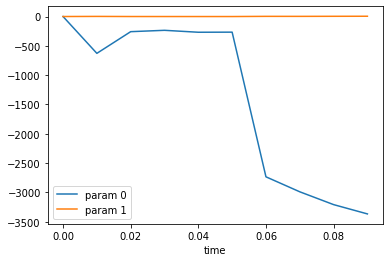

In [29]:
# Plot parameter evolution
plt.plot(dt*np.arange(Nt), params_evolved, label = [f"param {i}" for i in range(params_evolved.shape[1])])
plt.xlabel("time")
plt.legend(loc="best")